# Lattice Generation

Lets import some libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Generate a lattice from random base vectors

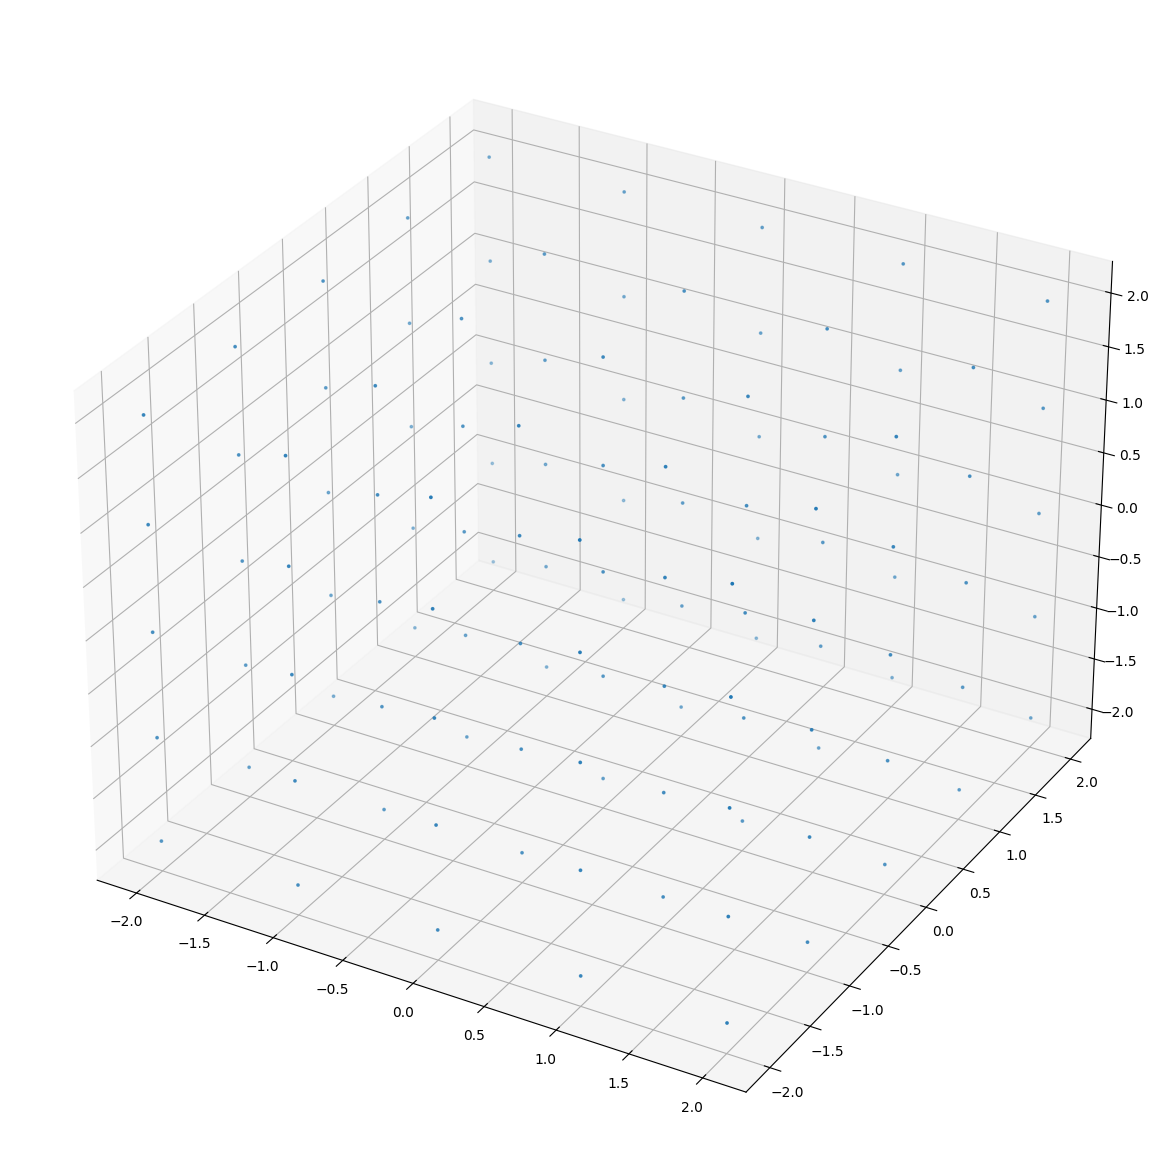

In [134]:
# base_a = np.random.randn(3)
# base_b = np.random.randn(3)
# base_c = np.random.randn(3)

base_a = np.array([1,0,0])
base_b = np.array([0,1,0])
base_c = np.array([0,0,1])


base_vec_matrix = np.stack([base_a,base_b,base_c])

lin_comb_range = (-2,3)
max_samples_per_cluster = 10
max_divident = 20
min_divident = 10

lattice = np.array([fac @ base_vec_matrix for fac in np.stack(np.meshgrid(np.arange(lin_comb_range[0], lin_comb_range[1]), np.arange(lin_comb_range[0], lin_comb_range[1]), np.arange(lin_comb_range[0], lin_comb_range[1]))).reshape(3, -1).T])

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')
ax.scatter(lattice[:,0], lattice[:,1], lattice[:,2], s=3)

Text(0.5, 0, 'z')

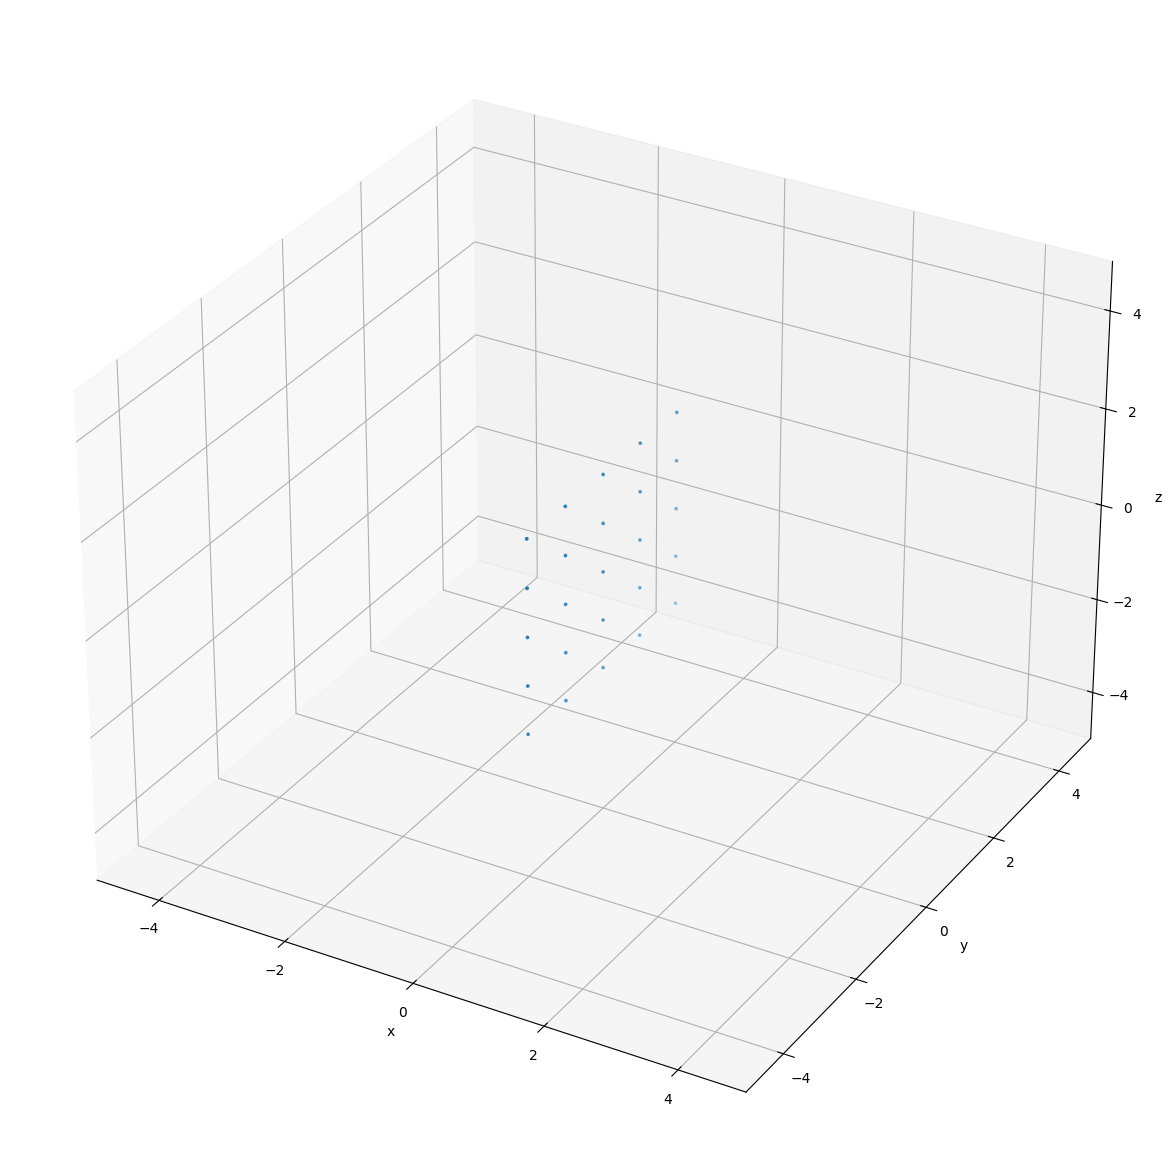

In [178]:
EPS = 1e-1

plane_normal_vector = np.array([1,0,0])
plane_normal_vector = plane_normal_vector / np.linalg.norm(plane_normal_vector)
dist_to_plane = np.array([np.abs(p @ plane_normal_vector) for p in lattice])
points_on_plane = lattice[dist_to_plane <= EPS]

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')
ax.scatter(points_on_plane[:,0], points_on_plane[:,1], points_on_plane[:,2], s=3)
ax.set_xlim((-5,5))
ax.set_ylim((-5,5))
ax.set_zlim((-5,5))

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

1.0

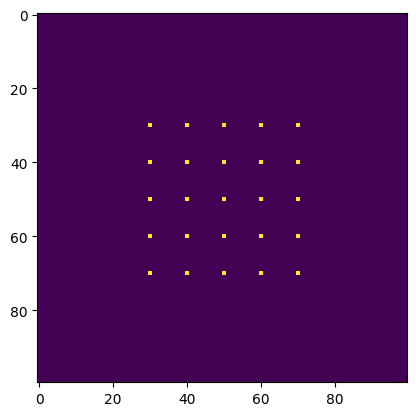

In [181]:
from scipy.spatial.transform import Rotation

img_top_left = np.array([5,5])
img_size = np.array([10,10])
img_res = np.array([100,100])
img = np.zeros(img_res)

inv_plane_rotation = Rotation.from_euler('xyz',[0,0,np.arccos(plane_normal_vector @ np.array([1,0,0]))]).as_matrix()


for p in points_on_plane:
    p_idx = (((inv_plane_rotation @ p)[1:] + img_top_left) / img_size * img_res).astype(int)
    img[p_idx[0], p_idx[1]] = 1
    
plt.imshow(img)

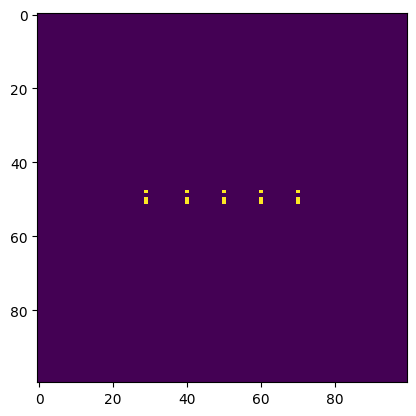

In [184]:
def generate_img_batch(params: dict):
    base_a = np.array([1, 0, 0])
    base_b = np.array([0, 1, 0])
    base_c = np.array([0, 0, 1])

    base_vec_matrix = np.stack([base_a, base_b, base_c])

    lin_comb_range = (-2, 3)

    lattice = np.array(
        [
            fac @ base_vec_matrix
            for fac in np.stack(
                np.meshgrid(
                    np.arange(lin_comb_range[0], lin_comb_range[1]),
                    np.arange(lin_comb_range[0], lin_comb_range[1]),
                    np.arange(lin_comb_range[0], lin_comb_range[1]),
                )
            )
            .reshape(3, -1)
            .T
        ]
    )
    EPS = 0.2

    images = list()

    plane_rotations_z = np.linspace(-np.pi, np.pi, 10)

    for rot in plane_rotations_z:
        plane_normal_vector = (
            np.array([1, 0, 0]) @ Rotation.from_euler("xyz", [0, 0, rot]).as_matrix()
        )
        plane_normal_vector = plane_normal_vector / np.linalg.norm(plane_normal_vector)
        dist_to_plane = np.array([np.abs(p @ plane_normal_vector) for p in lattice])
        points_on_plane = lattice[dist_to_plane <= EPS]

        img_top_left = np.array([5, 5])
        img_size = np.array([10, 10])
        img_res = np.array([100, 100])
        img = np.zeros(img_res)
        inv_plane_rotation = np.linalg.inv(Rotation.from_euler('xyz',[0,0,np.arccos(plane_normal_vector @ np.array([1,0,0]))]).as_matrix())

        for p in points_on_plane:
            p_idx = (
                ((p @ inv_plane_rotation)[1:] + img_top_left) / img_size * img_res
            ).astype(int)
            img[p_idx[0], p_idx[1]] = 1

        images.append(img)

    return images


images = generate_img_batch({})
plt.imshow(images[1])

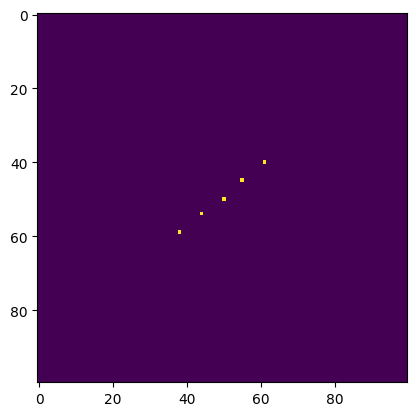